In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/student-marks-dataset")

print("Path to dataset files:", path)

100%|██████████| 949/949 [00:00<00:00, 1.55MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/student-marks-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
import os

folder = path
files = os.listdir(folder)
files

['Student_Marks.csv']

In [ ]:
df = pd.read_csv(folder +"/Student_Marks.csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [ ]:
print("Correlation Matrix:")
print(df.corr())

Correlation Matrix:
                number_courses  time_study     Marks
number_courses        1.000000    0.204844  0.417335
time_study            0.204844    1.000000  0.942254
Marks                 0.417335    0.942254  1.000000


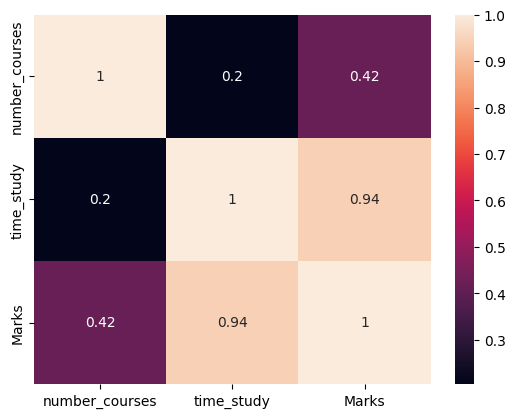

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()


In [ ]:
# Taking more courses does NOT strongly increase marks

# Quality of study time matters more than quantity of subjects

Text(0, 0.5, 'Marks')

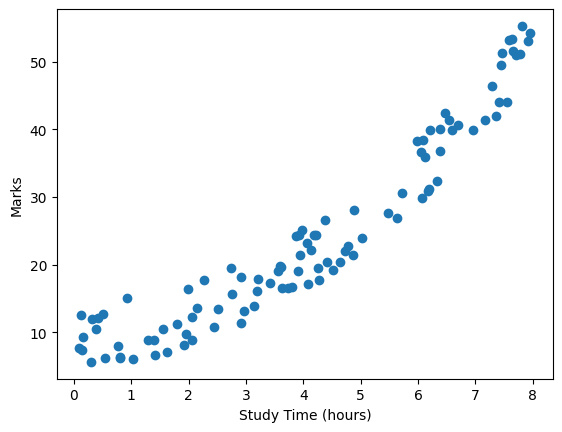

In [ ]:
# visualize the relationship clearly

plt.scatter(df['time_study'], df['Marks'])
plt.xlabel("Study Time (hours)")
plt.ylabel("Marks")


In [ ]:
# Split data (training & testing) with Time study

from sklearn.model_selection import train_test_split

X = df[['time_study']]
y = df['Marks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict

y_pred = model.predict(X_test)
y_pred[:5]


array([19.63652844, 34.90990545, 22.52304675, 13.55288318, 12.97986378])

In [ ]:
# Evaluate Model

from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2 Score:", r2)


MAE: 3.9689515350594236
R2 Score: 0.9040228286990537


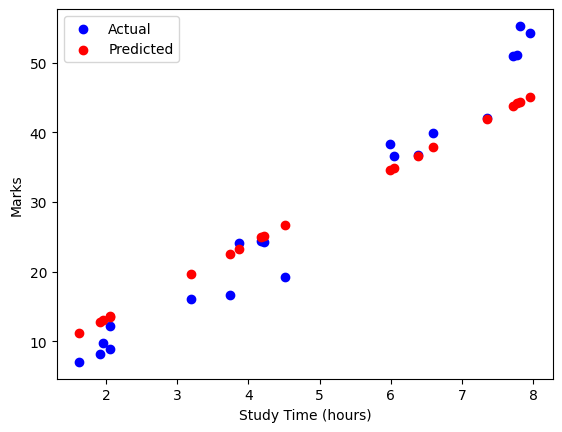

In [ ]:
# Visualize Prediction vs Actual

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Study Time (hours)")
plt.ylabel("Marks")
plt.legend()
plt.show()


In [ ]:
# Now will check does studying many subjects help improve marks? time study and Number courses

# Train model with BOTH features

X = df[['time_study', 'number_courses']]
y = df['Marks']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

mae2 = mean_absolute_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("MAE (2 features):", mae2)
print("R2 (2 features):", r2_2)


MAE (2 features): 3.079345229666691
R2 (2 features): 0.9459936100591211


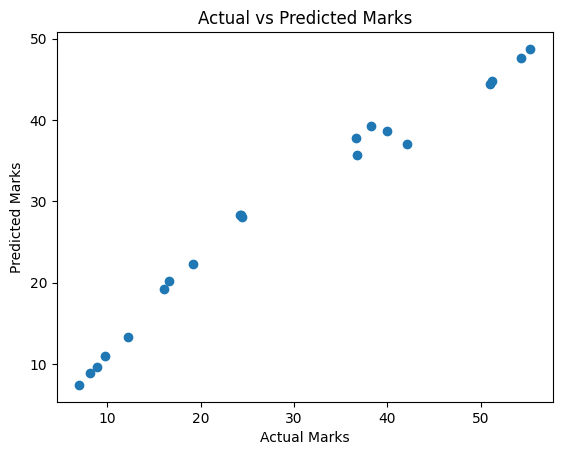

In [ ]:
# Visualize the prediction line

plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.show()


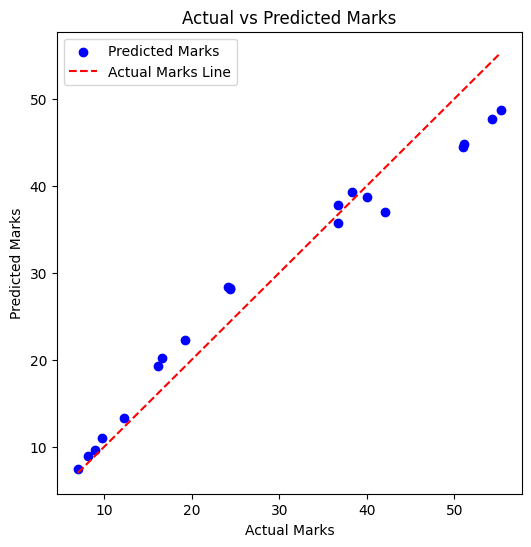

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred2, color="blue", label="Predicted Marks")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Actual Marks Line")

plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.legend()
plt.show()


# Residual Plot

**This shows:**

**where the model makes mistakes**

**whether errors are random (good) or patterned (bad)**

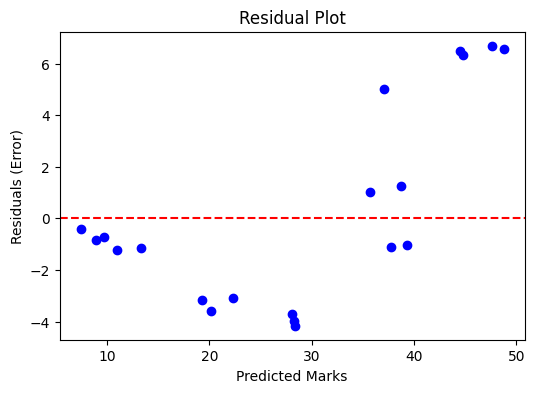

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred2

plt.figure(figsize=(6,4))
plt.scatter(y_pred2, residuals, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Marks")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()
